In [ ]:
# Strategy:
#
# STEP 2:
#  * do the same with validation data (normal and anomalous sounds)
# si les données correspondent à un défaut, prendre l'oppsé de la valeur
# calculer les proba d'appartenance de chaque son en faisant des batchs par spectrogramme
# spectrogrammes OK : quels résultats / proportion de bons classements
# spectrogrammes défaut : quel résultat / proportion de bons classements

In [ ]:
# Author : Antoine
# First try of classification with KNN
# use only fan data, use normal and anomalous data for training
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # Pour l'affichage d'images

from joblib import dump, load

from sklearn import neighbors
from sklearn.model_selection import train_test_split

#import numpy as np # Pour la manipulation de tableaux
#import pandas as pd # Pour manipuler des DataFrames pandas

from matplotlib import cm # Pour importer de nouvelles cartes de couleur
# %matplotlib inline

from keras.models import Sequential # Pour construire un réseau de neurones
from keras.layers import Dense # Pour instancier une couche dense
from keras.utils import np_utils

import itertools # Pour créer des iterateurs

from sklearn import metrics # Pour évaluer les modèles

In [ ]:
from google.colab import drive
drive.mount('/drive')

Mounted at /drive


In [ ]:
#chargement du modèle
from keras.models import load_model

model_save_name = 'nn1.h5'
path = F"/drive/MyDrive/asdpy/models/{model_save_name}" 
model = load_model(path)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                6450      
_________________________________________________________________
dense_1 (Dense)              (None, 7)                 357       
Total params: 6,807
Trainable params: 6,807
Non-trainable params: 0
_________________________________________________________________


In [ ]:
machines = [            # TEST DATA SIZE
    'fan',              # (1875, 40065)
    'pump',             # (856, 40065)
    'slider',           # (1290, 40065)
    'ToyCar',           # (2459, 44033)
    'ToyConveyor',      # (3509, 40065)
    'valve'             # (879, 40065)
]

# machines = ['verif_1', 'verif_2']

In [ ]:
id_machine = 0
height = 128

# init array with expected width (equals image heigh + one for target)

set = 'test'

for machine in machines:

    # identifiant de la machine
    id_machine = id_machine + 1

    print(machine, '/', id_machine)

    # example : '../data/fan/train_png/'
    # working_directory = '../../data/'+machine+'/'
    working_directory = '/drive/MyDrive/asdpy/data/'

    # data file example: df_fan_train.joblib
    # numpy ndarray
    # dernière colonne = type de donnée, normal ou anomalie
    data_array = load(working_directory + 'df_'+machine+'_'+set+'.joblib')

    # limit data to spare RAM 
    if data_array.shape[0] > 2500:
      data_array = data_array[:2500,:]

    print(data_array.shape)

    nb_images = data_array.shape[0]
    pixels = data_array.shape[1] - 1
    width = int(pixels/height)

    #print("nb_images : ", nb_images)
    #print("width : ", width)

    for i in range(nb_images):
        img = data_array[i]
        type = img[-1]

        #print("img.shape :")
        #print(img.shape) # (40065,)
        #print(img)
        #print("type :")
        #print(type)

        lines = img[0:-1].reshape(height,width).T
        #print("lines :")
        #print(lines)

        id_machine_pred = predictImageType(model, lines)

        print("id_machine : ", id_machine, " / ", id_machine_pred, "(type ", type,")")
        # break


    # break



    # 14 minutes pour les 4 premieres machines...
    # 16 secondes pour 5 machines une fois optimisé
    # 45 secondes avec les 6 jeux de train et bridage à 2500 lignes par jeu


Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
id_machine :  4  /  5 (type  1.0 )
id_machine :  4  /  5 (type  1.0 )
id_machine :  4  /  5 (type  1.0 )
id_machine :  4  /  5 (type  1.0 )
id_machine :  4  /  5 (type  1.0 )
id_machine :  4  /  5 (type  1.0 )
id_machine :  4  /  5 (type  1.0 )
id_machine :  4  /  5 (type  1.0 )
id_machine :  4  /  5 (type  1.0 )
id_machine :  4  /  5 (type  1.0 )
id_machine :  4  /  5 (type  1.0 )
id_machine :  4  /  5 (type  1.0 )
id_machine :  4  /  5 (type  1.0 )
id_machine :  4  /  5 (type  1.0 )
id_machine :  4  /  5 (type  1.0 )
id_machine :  4  /  5 (type  1.0 )
id_machine :  4  /  5 (type  1.0 )
id_machine :  4  /  5 (type  1.0 )
id_machine :  4  /  5 (type  1.0 )
id_machine :  4  /  5 (type  1.0 )
id_machine :  4  /  5 (type  1.0 )
id_machine :  4  /  5 (type  1.0 )
id_machine :  4  /  5 (type  1.0 )
id_machine :  4  /  5 (type  1.0 )
id_machine :  4  /  5 (type  1.0 )
id_machine :  4  /  5 (type  1.0 )
id_machine :

In [ ]:
def predictImageType(model, lines):
  pred = model.predict(lines).mean(axis=0)
  #print("pred :")
  #print(np.round(pred,2))
  #print("pred.shape :")
  #print(pred.shape)

  idx_max = pred.argmax()
  #print("idx max :")
  #print(idx_max)
  return idx_max+1

predictImageType(model, lines)

5

In [ ]:
predictImageType(model, lines)

pred :
[[0.0000000e+00 1.4326200e-37 0.0000000e+00 ... 1.0000000e+00
  3.5867951e-24 0.0000000e+00]
 [0.0000000e+00 1.4326200e-37 0.0000000e+00 ... 1.0000000e+00
  3.5867951e-24 0.0000000e+00]
 [0.0000000e+00 1.4326200e-37 0.0000000e+00 ... 1.0000000e+00
  3.5867951e-24 0.0000000e+00]
 ...
 [4.4441720e-20 8.0150892e-14 9.9999988e-01 ... 9.6616406e-34
  1.5688402e-22 3.0407730e-08]
 [4.4441720e-20 8.0150892e-14 9.9999988e-01 ... 9.6616406e-34
  1.5688402e-22 3.0407730e-08]
 [4.4441548e-20 8.0150892e-14 9.9999988e-01 ... 9.6615671e-34
  1.5688283e-22 3.0407495e-08]]
pred.shape :
(313, 7)


In [ ]:
id_machine = 0
height = 128

# init array with expected width (equals image heigh + one for target)
global_array = np.empty([0, height+1])

set = 'test'

for machine in machines:

    # identifiant de la machine
    id_machine = id_machine + 1

    print(machine, '/', id_machine)

    # example : '../data/fan/train_png/'
    # working_directory = '../../data/'+machine+'/'
    working_directory = '/drive/MyDrive/asdpy/data/'

    # data file example: df_fan_train.joblib
    # numpy ndarray
    # dernière colonne = type de donnée, normal ou anomalie
    data_array = load(working_directory + 'df_'+machine+'_'+set+'.joblib')

    # limit data to spare RAM 
    if data_array.shape[0] > 2500:
      data_array = data_array[:2500,:]

    print(data_array.shape)

    nb_images = data_array.shape[0]
    pixels = data_array.shape[1] - 1
    width = int(pixels/height)

    #print("nb_images : ", nb_images)
    #print("width : ", width)

    loop_array = data_array[:,0:-1].reshape(height,width*nb_images).T

    # vecteur aussi long que le nombre de lignes verticales
    id_machine_col = np.ones((width*nb_images,1), dtype=np.int16)*id_machine

    # colle le vecteur à droite de l'array
    loop_array = np.append(loop_array, id_machine_col, axis=1)
  
    # ajoute au tableau global
    global_array = np.append(global_array, loop_array, axis=0)

    # 14 minutes pour les 4 premieres machines...
    # 16 secondes pour 5 machines une fois optimisé
    # 45 secondes avec les 6 jeux de train et bridage à 2500 lignes par jeu


fan / 1
(1875, 40065)
pump / 2
(856, 40065)
slider / 3
(1290, 40065)
ToyCar / 4
(2459, 44033)
ToyConveyor / 5
(2500, 40065)
valve / 6
(879, 40065)


In [ ]:
print("CREATE TRAINING DATAFRAME...")

# réduit la dimension de l'array pour les tests
np.random.shuffle(global_array)
data = global_array[0:1000*1000,:]

df = pd.DataFrame(data)

# séparation des données de la cible
data = df.iloc[:,0:-1]
target = df.iloc[:,-1:]

print("SPLIT DATA...")
# séparation des données d'entrainement (70%) et de test (30%)
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size = 0.30, random_state=66)

CREATE TRAINING DATAFRAME...
SPLIT DATA...


In [ ]:
y_train = np_utils.to_categorical(y_train, dtype = 'int')
y_test = np_utils.to_categorical(y_test, dtype = 'int')

print("y_test.shape")
print(y_test.shape)

num_pixels = X_train.shape[1]
num_classes = y_test.shape[1]

print("num_classes : ", num_classes)

y_test.shape
(300000, 7)
num_classes :  7


In [ ]:
# prédiction des données
# about 40 seconds
test_pred = model.predict(X_test)

# score du modèle
score = model.evaluate(X_test, y_test)
print(score)

# Prediction de l'échantillon de test
test_pred = model.predict(X_test)

test_pred_class = np.argmax(test_pred, axis=1)
y_test_class = np.argmax(y_test, axis=1)

print("Performances du modele :")
print(metrics.classification_report(y_test_class, test_pred_class))

9375/9375 [==============================] - 13s 1ms/step - loss: 6.1069 - accuracy: 0.4002
[6.106943130493164, 0.4002033472061157]
Performances du modele :
              precision    recall  f1-score   support

           1       0.17      0.00      0.00     55731
           2       0.47      0.51      0.49     25493
           3       0.19      0.11      0.14     38351
           4       0.53      0.98      0.69     80080
           5       1.00      0.08      0.14     74234
           6       0.19      0.72      0.31     26111

    accuracy                           0.40    300000
   macro avg       0.43      0.40      0.29    300000
weighted avg       0.50      0.40      0.31    300000



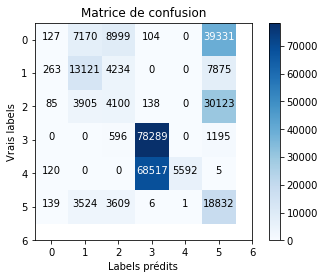

In [ ]:
# affiche la matrice de confusion sous forme de tableau coloré
classes = range(0,num_classes)

plt.figure()

# matrice de confusion
cnf_matrix = metrics.confusion_matrix(y_test_class, test_pred_class)

plt.imshow(cnf_matrix, interpolation='nearest',cmap='Blues')
plt.title("Matrice de confusion")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

# texte et couleur
for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
    plt.text(j, i, cnf_matrix[i, j],
             horizontalalignment = "center",
             color = "white" if cnf_matrix[i, j] > ( cnf_matrix.max() / 2) else "black")

plt.ylabel('Vrais labels')
plt.xlabel('Labels prédits')
plt.show()

